# Project Background and Objective

I was asked to find out insights from data to cast light on increasing revenue for next quarter by 5%. So in this project I took every effort to explore interesting things hidden behind the data and inform decision making to increase revenue.

## Input data, Interpreting and Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import warnings
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
from pandasql import sqldf

pysql = lambda q: sqldf(q, globals())
%matplotlib inline
warnings.filterwarnings('ignore')
plotly.tools.set_credentials_file(username='dorismue03', api_key='PKgs6IsONoDHK94JDAla')

In [2]:
df = pd.read_csv("Python_project_eda.csv")

In [3]:
df.shape

(566699, 15)

### Check missing values

In [4]:
# check which columns have missing values
df.columns[df.isnull().any()].tolist()

['clicked_buy_before',
 'country',
 'made_purchase_before',
 'saw_cart_before',
 'spend_usd_next_14_days',
 'user_added_credit_card',
 'user_added_dcb',
 'user_added_gift_card',
 'user_added_paypal']

In [5]:
subset = df.loc[:,('clicked_buy_before', 'made_purchase_before', 'saw_cart_before', 'spend_usd_next_14_days','user_added_credit_card','user_added_dcb','user_added_gift_card','user_added_paypal', 'user_added_fop')]
subset = subset.fillna(0)
df.loc[:,('clicked_buy_before', 'made_purchase_before', 'saw_cart_before', 'spend_usd_next_14_days','user_added_credit_card','user_added_dcb','user_added_gift_card','user_added_paypal', 'user_added_fop')] = subset 
df['country'] = df['country'].fillna('unknow')


In [6]:
df[df.isnull().any(axis=1)]

,buyer_week_before,clicked_buy_before,country,existing_buyer,initial_fop_set,made_purchase_before,saw_cart_before,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,user_id,visit_before


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566699 entries, 0 to 566698
Data columns (total 15 columns):
buyer_week_before         566699 non-null int64
clicked_buy_before        566699 non-null float64
country                   566699 non-null object
existing_buyer            566699 non-null int64
initial_fop_set           566699 non-null bool
made_purchase_before      566699 non-null float64
saw_cart_before           566699 non-null float64
spend_usd_next_14_days    566699 non-null float64
user_added_credit_card    566699 non-null float64
user_added_dcb            566699 non-null float64
user_added_fop            566699 non-null int64
user_added_gift_card      566699 non-null float64
user_added_paypal         566699 non-null float64
user_id                   566699 non-null uint64
visit_before              566699 non-null int64
dtypes: bool(1), float64(8), int64(4), object(1), uint64(1)
memory usage: 61.1+ MB


In [8]:
subset1 = df.loc[:,("clicked_buy_before", "made_purchase_before", "saw_cart_before", "user_added_credit_card", "user_added_dcb", "user_added_gift_card", "user_added_paypal")]
subset_conversed = subset1.astype(int)
df.loc[:,("clicked_buy_before", "made_purchase_before", "saw_cart_before", "user_added_credit_card", "user_added_dcb", "user_added_gift_card", "user_added_paypal")] = subset_conversed

In [9]:
df.head(10)

,buyer_week_before,clicked_buy_before,country,existing_buyer,initial_fop_set,made_purchase_before,saw_cart_before,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,user_id,visit_before
0,0,0,IN,0,False,0,1,0.000000,0,0,0,0,0,18321316048201303366,1
1,0,0,IN,0,False,0,1,0.000000,0,0,0,0,0,13705367724816913241,1
2,0,0,IN,0,False,0,0,0.000000,0,0,0,0,0,6605724765451655114,0
3,0,1,CA,1,True,1,1,7.398815,1,0,1,0,0,2340067911948261502,1
4,7,1,PL,1,True,1,1,0.000000,0,1,1,0,0,11891045596810635427,1
5,0,0,ID,0,False,0,1,0.000000,0,0,0,0,0,16960375743361213328,1
6,0,1,TH,0,True,1,1,0.000000,0,1,1,0,0,14845700381773612658,1
7,0,0,ID,0,False,0,1,0.000000,0,0,0,0,0,1407472760358057975,1
8,0,0,unknow,0,False,0,1,0.000000,0,0,0,0,0,795175088989280187,1
9,0,0,GR,0,False,0,1,0.000000,0,0,0,0,0,6034351615620544692,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566699 entries, 0 to 566698
Data columns (total 15 columns):
buyer_week_before         566699 non-null int64
clicked_buy_before        566699 non-null int64
country                   566699 non-null object
existing_buyer            566699 non-null int64
initial_fop_set           566699 non-null bool
made_purchase_before      566699 non-null int64
saw_cart_before           566699 non-null int64
spend_usd_next_14_days    566699 non-null float64
user_added_credit_card    566699 non-null int64
user_added_dcb            566699 non-null int64
user_added_fop            566699 non-null int64
user_added_gift_card      566699 non-null int64
user_added_paypal         566699 non-null int64
user_id                   566699 non-null uint64
visit_before              566699 non-null int64
dtypes: bool(1), float64(1), int64(11), object(1), uint64(1)
memory usage: 61.1+ MB


### Tackle outliers

In [11]:
df.describe()

,buyer_week_before,clicked_buy_before,existing_buyer,made_purchase_before,saw_cart_before,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,user_id,visit_before
count,566699.000000,566699.000000,566699.000000,566699.000000,566699.000000,566699.000000,566699.000000,566699.000000,566699.000000,566699.000000,566699.000000,5.666990e+05,566699.000000
mean,0.621745,0.225458,0.268135,0.184654,0.816589,10.653198,0.165135,0.144371,0.301036,0.055666,0.030085,9.222149e+18,0.874609
std,1.701956,0.417884,0.442989,0.388017,0.387004,88.375608,0.371303,0.351466,0.458709,0.229276,0.170821,5.319984e+18,0.331162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.099261e+12,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.614402e+18,1.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.218982e+18,1.000000
75%,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.382236e+19,1.000000
max,8.000000,1.000000,1.000000,1.000000,1.000000,22519.570000,1.000000,1.000000,1.000000,1.000000,1.000000,1.844674e+19,1.000000


The max of 'spend for the next 14 days' is 22519.57 dollars, which seems irregalar.

Outliers sometimes misguide the analysis, therefore lead to incorrect results. Avoiding this I will use a method winsorization to replace the outliers.

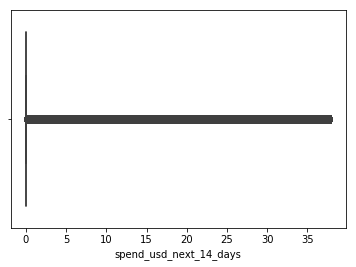

In [12]:
def winsorize_series(s):
    lower = s.quantile(0.05)
    upper = s.quantile(0.95)
    s[s < lower] = lower
    s[s > upper] = upper
    return s
df.spend_usd_next_14_days = winsorize_series(df.spend_usd_next_14_days)
sns.boxplot(data=df, x = 'spend_usd_next_14_days')

## Exploratory Data Analysis for Business Insights

### Insight 1: Adding gift cards to acounts make a surge in average spending for dcb(direct carrier billing) users.


First, let's see whether there is a difference in spending among users with different payment types

In [13]:
rev_by_fop = df.pivot_table(values=["spend_usd_next_14_days"], index = ["user_added_fop"], aggfunc=np.mean).reset_index()
rev_by_creditcard = df.pivot_table(values=["spend_usd_next_14_days"], index = ["user_added_credit_card"], aggfunc=np.mean).reset_index()
rev_by_dcb = df.pivot_table(values=["spend_usd_next_14_days"], index = ["user_added_dcb"], aggfunc=np.mean).reset_index()
rev_by_giftcard = df.pivot_table(values=["spend_usd_next_14_days"], index = ["user_added_gift_card"], aggfunc=np.mean).reset_index()
rev_by_paypal = df.pivot_table(values=["spend_usd_next_14_days"], index = ["user_added_paypal"], aggfunc=np.mean).reset_index()

In [14]:
x = ['any_form_of_payment', 'credit_card', 'direct carrier billing', 'gift card', 'paypal']
y1 = rev_by_fop['spend_usd_next_14_days'].tolist()
y2 = rev_by_creditcard['spend_usd_next_14_days'].tolist()
y3 = rev_by_dcb['spend_usd_next_14_days'].tolist()
y4 = rev_by_giftcard['spend_usd_next_14_days'].tolist()
y5 = rev_by_paypal['spend_usd_next_14_days'].tolist()

data = pd.DataFrame({
    'form_of_payment': x,
    'no':[y1[0], y2[0], y3[0], y4[0], y5[0]],
    'yes':[y1[1], y2[1], y3[1], y4[1], y5[1]]
    
})
data['gaps'] = data['yes']-data['no']

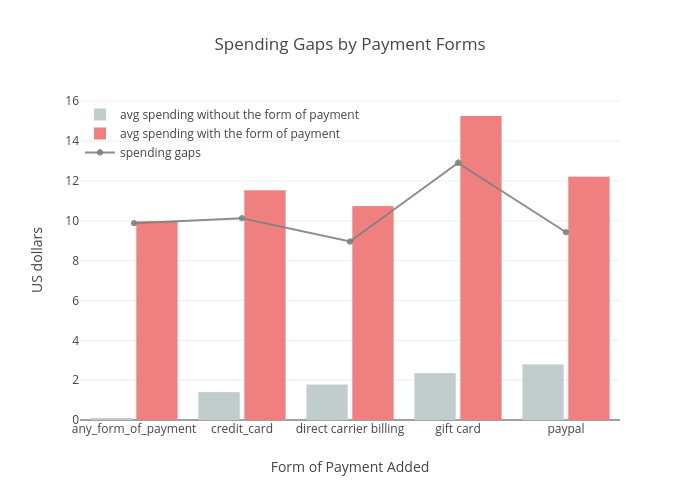

In [15]:
import plotly
plotly.tools.set_credentials_file(username='Tinag', api_key='sLqhPZoFSVShHoYTwR3D')

trace1 = go.Bar(x = data["form_of_payment"],
                y = data["no"],
                name = "avg spending without the form of payment",
                marker=dict(
                    color='rgb(193,205,205)'
                    )
                )
               

trace2 = go.Bar(x = data["form_of_payment"],
                y = data["yes"],
                name = "avg spending with the form of payment",
                marker=dict(
                    color='rgb(240,128,128)'
                    )
                )

trace3 = go.Scatter(x = data["form_of_payment"],
                   y = data["gaps"],
                   mode = "lines+markers",
                   name = "spending gaps",
                   marker = dict(
                       color = "rgba(128,128,128,0.9)"
                   )
                  )

layout = go.Layout(title = "Spending Gaps by Payment Forms",
                   xaxis = dict(
                       title = "Form of Payment Added"
                   ),
                   yaxis = dict(
                       title = "US dollars",
                       showgrid = True),
                   legend=dict(
                       x=0,
                       y=1,
                       bgcolor='rgba(255, 255, 255, 0)',
                       bordercolor='rgba(255, 255, 255, 0)'
                   ),
                   barmode='group',
                   bargap=0.15,
                   bargroupgap=0.1
                  )
                  

data = [trace1, trace2, trace3]
fig = go.Figure(data = data, layout = layout)

#py.iplot(fig)                      
py.image.ishow(fig)

We can see from the above chart, users will spend more than 7x on purchase when they add a gift card to the account. Then we can say that incentivizing users to add gift cards would make them purchase more.
Then I wounder whether I should target all users or just subsets of the users. In order to answer this question, I conduct further data analysis.

In [16]:
num_of_user_with_gc = len(df[df["user_added_gift_card"] == 1])
num_of_user_gc_only = len(df[(df["user_added_gift_card"] == 1) & (df["user_added_dcb"] == 0) & (df["user_added_credit_card"] == 0) & (df["user_added_paypal"] == 0)])
num_of_user_gc_and_creditcard = len(df[(df["user_added_credit_card"] == 1) & (df["user_added_gift_card"] == 1) & (df["user_added_dcb"] == 0) & (df["user_added_paypal"] == 0)])
num_of_user_gc_and_dcb = len(df[(df["user_added_dcb"] == 1) & (df["user_added_gift_card"] == 1) & (df["user_added_credit_card"] == 0) & (df["user_added_paypal"] == 0)])
num_user_gc_and_paypal = len(df[(df["user_added_gift_card"] == 1) & (df["user_added_paypal"] == 1) & (df["user_added_credit_card"] == 0) & (df["user_added_dcb"] == 0)])
number_of_user_gc_creditcard_dcb = len(df[(df["user_added_credit_card"] == 1) & (df["user_added_dcb"] == 1) & (df["user_added_gift_card"] == 1) & (df["user_added_paypal"] == 0)])
rest = num_of_user_with_gc - (num_of_user_gc_and_creditcard + num_of_user_gc_and_dcb + num_of_user_gc_only + number_of_user_gc_creditcard_dcb + num_user_gc_and_paypal)

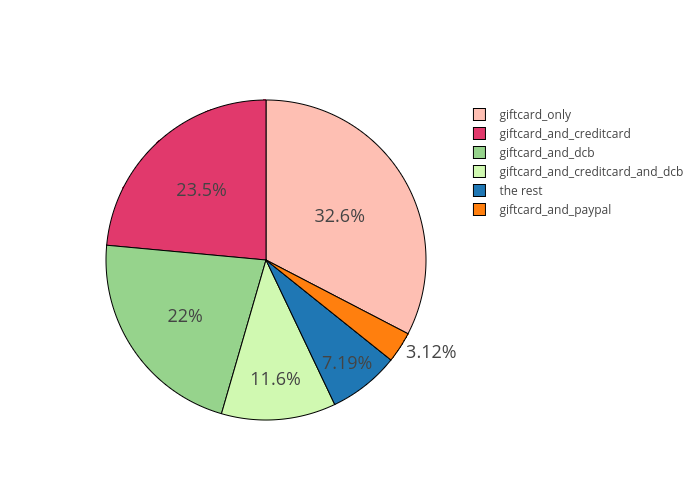

In [17]:
labels = ['giftcard_only','giftcard_and_creditcard', "giftcard_and_dcb", "giftcard_and_creditcard_and_dcb", "giftcard_and_paypal", "the rest"]

values = [num_of_user_gc_only, num_of_user_gc_and_creditcard,num_of_user_gc_and_dcb, number_of_user_gc_creditcard_dcb, num_user_gc_and_paypal, rest]
colors = ['#FEBFB3', '#E1396C', '#96D38C', '#D0F9B1', ""]

trace = go.Pie(labels=labels, 
               values=values, 
               textfont=dict(size=18), 
               marker = dict(
                   colors = colors, 
                   line = dict(
                       color = '#000000',
                       width = 1
                   )
               )
              )
                                                                            

py.image.ishow([trace])

From the above chart, we can find the customers tend to use the combination of gift cards and credit cards or the combination of gift card and dcb to pay their orders.
Then I consider that whether I could increase the spendings by incentivizing more credit card users and dcb users to add a gift card to the account.

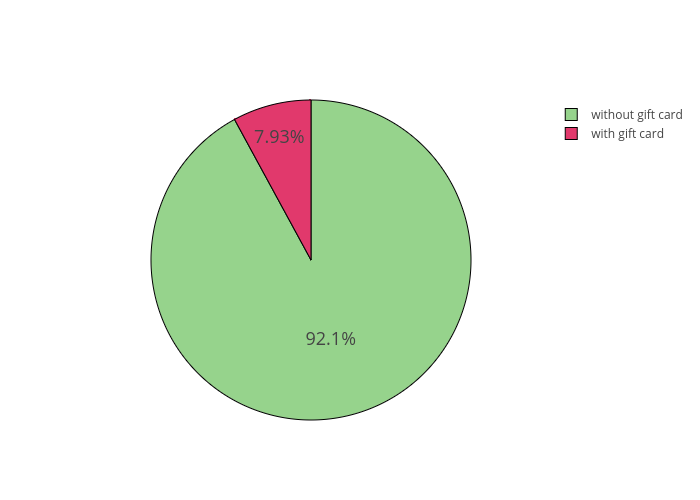

In [18]:
num_of_user_creditcard = len(df[df["user_added_credit_card"] == 1])
num_of_user_dcb = len(df[df["user_added_dcb"] == 1])

values = [num_of_user_gc_and_creditcard, num_of_user_creditcard - num_of_user_gc_and_creditcard]
labels = ["with gift card", "without gift card"]
colors = ['#E1396C', '#96D38C']

trace = go.Pie(labels = labels,
               values = values,
               textfont = dict(
                   size = 18
               ),
               marker = dict(colors=colors,
                   line = dict(
                       color = '#000000',
                       width = 1
                   )
               )
              )

py.image.ishow([trace])

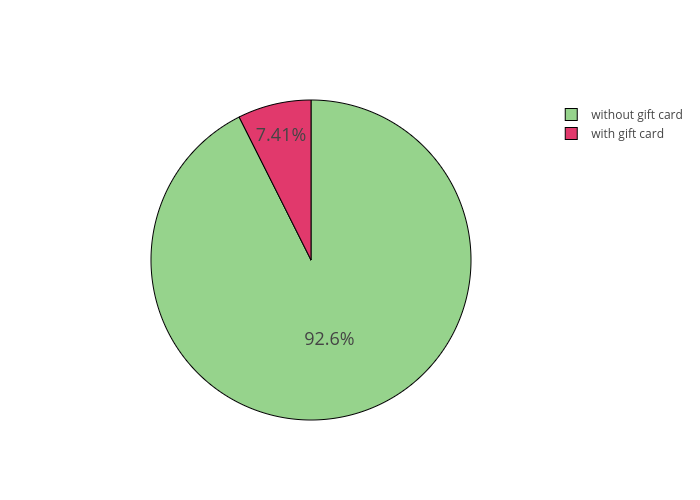

In [19]:
values = [num_of_user_gc_and_dcb, num_of_user_creditcard - num_of_user_gc_and_dcb]
labels = ["with gift card", "without gift card"]
colors = ['#E1396C', '#96D38C']

trace = go.Pie(labels = labels,
               values = values,
               textfont = dict(
                   size = 18
               ),
               marker = dict(colors=colors,
                   line = dict(
                       color = '#000000',
                       width = 1
                   )
               )
              )

py.image.ishow([trace])

From the above two pie charts, I know there is very few proportion of the credit card users and dcb users who have added a gift card to the account. Then I need to check the impact of adding gift cards would have on the average spending in credit card and dcb users.

In [20]:
user_with_creditcard = df[df["user_added_credit_card"] == 1]
user_with_dcb = df[df["user_added_dcb"] == 1]

user_with_creditcard["with_gc"] = user_with_creditcard["user_added_credit_card"]*user_with_creditcard["user_added_gift_card"]
user_with_dcb["with_gc"] = user_with_dcb["user_added_dcb"]*user_with_dcb["user_added_gift_card"]

spend_creditcard_user = user_with_creditcard.pivot_table(values=["spend_usd_next_14_days"], index = ["with_gc"], aggfunc=np.mean).reset_index()

spend_dcb_user = user_with_dcb.pivot_table(values=["spend_usd_next_14_days"], index = ["with_gc"], aggfunc=np.mean).reset_index()

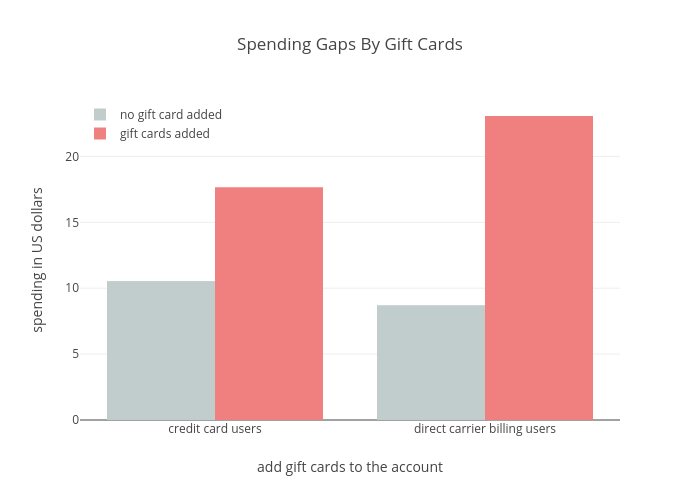

In [21]:
x = ['credit card users', "direct carrier billing users"]
y1 = [spend_creditcard_user["spend_usd_next_14_days"][0], spend_dcb_user["spend_usd_next_14_days"][0]]
y2 = [spend_creditcard_user["spend_usd_next_14_days"][1], spend_dcb_user["spend_usd_next_14_days"][1]]

trace1 = go.Bar(x = x,
                y = y1,
                marker = dict(
                    color = "rgb(193,205,205)"
                    ),
                name = "no gift card added"
                )

trace2 = go.Bar(x = x,
                y = y2,
                name = 'gift cards added',
                marker = dict(
                    color = "rgb(240,128,128)"
                )
               )

data = [trace1, trace2]

layout = go.Layout(title = "Spending Gaps By Gift Cards",
                   xaxis = dict(
                       title = "add gift cards to the account"
                   ),
                   yaxis = dict(
                       title = "spending in US dollars"
                   ),
                   barmode = "group",
                   legend = dict(
                       x = 0,
                       y = 1,
                       bgcolor='rgba(255, 255, 255, 0)',
                       bordercolor='rgba(255, 255, 255, 0)'
                   )
                  )

fig = go.Figure(data=data, layout=layout)

py.image.ishow(fig)

## Recommendation 1

Given this I get my first insight that we can increase revenue for the next quarter by targeting the dcb users and incentivizing them to add gift cards to them account. In order to incentivize them , we will show a message under the check out button saying "Good News! You can also check out this item through the gift card!" and then offer a link to gift card purchase page.

### Insight 2:  A large gap between adding a cart and clicking checkout

In [22]:
visit = len(df[df["visit_before"] == 1])
add_to_cart = len(df[df["saw_cart_before"] == 1])
click_buy = len(df[df["clicked_buy_before"] == 1])
make_purchase = len(df[df["made_purchase_before"] == 1])

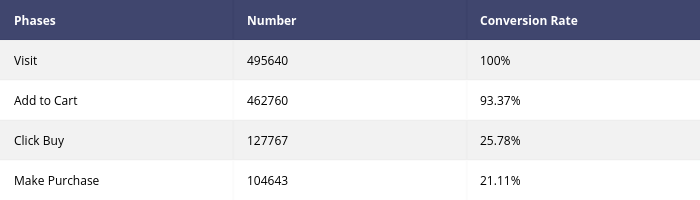

In [23]:
data = [['Phases', 'Number', "Conversion Rate"],
        ['Visit', 495640, "100%"],
        ['Add to Cart', 462760, "93.37%"],
        ['Click Buy', 127767, "25.78%"],
        ['Make Purchase', 104643, "21.11%"]
        ]

funnel_table = ff.create_table(data)

py.image.ishow(funnel_table)

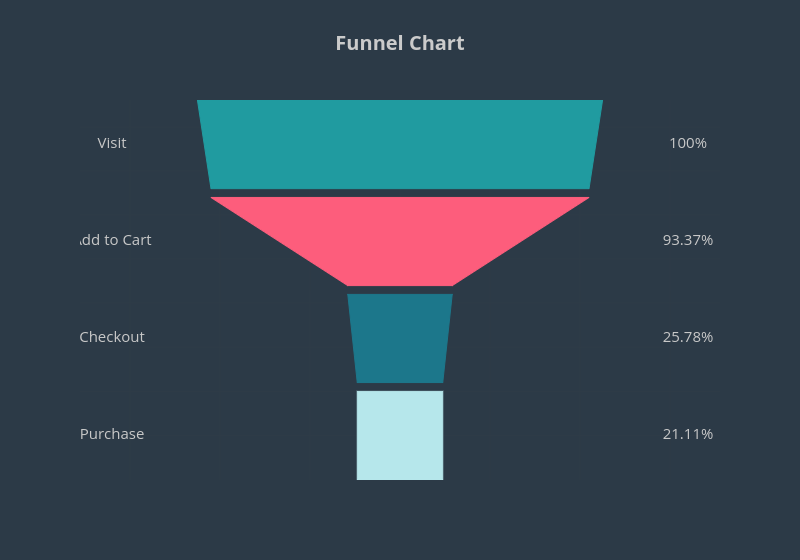

In [24]:
values = [495.64, 462.76, 127.767, 104.643]
phases = ['Visit', 'Add to Cart', "Checkout", 'Purchase']

# color of each funnel section
colors = ['rgb(32,155,160)', 'rgb(253,93,124)', 'rgb(28,119,139)', 'rgb(182,231,235)', 'rgb(35,154,160)']

n_phase = len(phases)
plot_width = 450

# height of a section and difference between sections 
section_h = 100
section_d = 10

# multiplication factor to calculate the width of other sections
unit_width = plot_width / max(values)

# width of each funnel section relative to the plot width
phase_w = [int(value * unit_width) for value in values]

# plot height based on the number of sections and the gap in between them
height = section_h * n_phase + section_d * (n_phase - 1)


# list containing all the plot shapes
shapes = []

# list containing the Y-axis location for each section's name and value text
label_y = []

for i in range(n_phase):
        if (i == n_phase-1):
                points = [phase_w[i] / 2, height, phase_w[i] / 2, height - section_h]
        else:
                points = [phase_w[i] / 2, height, phase_w[i+1] / 2, height - section_h]

        path = 'M {0} {1} L {2} {3} L -{2} {3} L -{0} {1} Z'.format(*points)

        shape = {
                'type': 'path',
                'path': path,
                'fillcolor': colors[i],
                'line': {
                    'width': 1,
                    'color': colors[i]
                }
        }
        shapes.append(shape)
        
        # Y-axis location for this section's details (text)
        label_y.append(height - (section_h / 2))

        height = height - (section_h + section_d)

# For phase names
label_trace = go.Scatter(
    x=[-320]*n_phase,
    y=label_y,
    mode='text',
    text=phases,
    textfont=dict(
        color='rgb(200,200,200)',
        size=15
    )
)
 
# For phase values
value_trace = go.Scatter(
    x=[320]*n_phase,
    y=label_y,
    mode='text',
    text=["100%", "93.37%", "25.78%", "21.11%"],
    textfont=dict(
        color='rgb(200,200,200)',
        size=15
    )
)

data = [label_trace, value_trace]
 
layout = go.Layout(
    title="<b>Funnel Chart</b>",
    titlefont=dict(
        size=20,
        color='rgb(203,203,203)'
    ),
    shapes=shapes,
    height=560,
    width=800,
    showlegend=False,
    paper_bgcolor='rgba(44,58,71,1)',
    plot_bgcolor='rgba(44,58,71,1)',
    xaxis=dict(
        showticklabels=False,
        zeroline=False,
    ),
    yaxis=dict(
        showticklabels=False,
        zeroline=False
    )
)
 
fig = go.Figure(data=data, layout=layout)

py.image.ishow(fig)


## Recommendation 2

The funnel shows there is a steep decrease in number when users who added a cart click checkout buttons. If we can take meaaures to lower the number of decrease we will make a increase in revenues. 

Recommendation: we should sent direct eamils to cusotmers who have been dormant for 3+ days after adding items to cart to remind them to check out. 

### Insight 3 : Spending for the next two weeks arise critically comparing between purchase weeks equal to 7 and purchase weeks equal to 8

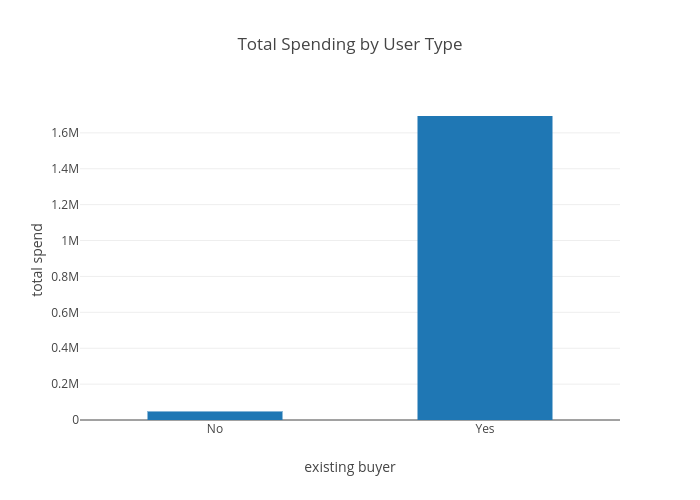

In [37]:
total_spend_by_user_type = df.pivot_table(values = ["spend_usd_next_14_days"], index = ["existing_buyer"], aggfunc=sum).reset_index()


x = ["No", "Yes"]
y = total_spend_by_user_type["spend_usd_next_14_days"].tolist()

data = [go.Bar(x = x, y = y, width = 0.5)]
layout = go.Layout(title = "Total Spending by User Type",
                   xaxis = dict(title = "existing buyer"),
                   yaxis = dict(title = "total spend")
                   
                  )

fig = go.Figure(data = data, layout = layout)

py.image.ishow(fig)

We can see from the above graph, total spending for the next 14 days arise significantly if it is an existing customers.

Then I am thinking which group of the existing customers we should target? the whole or some segments?

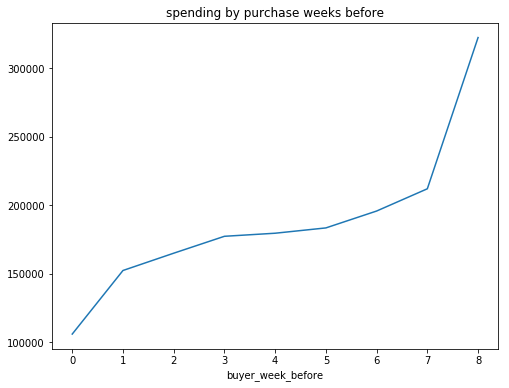

In [26]:
existing_buyer = df[df["existing_buyer"] == 1]


fig, ax = plt.subplots(figsize = (8,6))
ax = existing_buyer.groupby("buyer_week_before")["spend_usd_next_14_days"].sum().plot()
ax.set_title("spending by purchase weeks before")
plt.show();

## Recommendation 3

If buyers make a purchase every week in the past 8 weeks , he would have a steep increase in spending for the next 14 days, compared to those whose number of weeks making a purchase is 7.

Recommendation: I will target the US buyers who have 7 weeks making a purchase out of every 8 weeks and send coupons to incentivize them to make more purchases.


## Experiment Design

### Marketing Campaign

Now I select one of the three insights to carry out an experiment in order to examine its impact on the total revenue increase.

Strategy: Conduct a marketing campaign targeting the US existing customers who spent 7 weeks out of every 8 weeks. In the marketing campaign, we send coupons by direct emails to incentivize them to purchase more.

Senario: Sarah was considering to buy a new earphone but he thought the current one was ok, so buying a new one was not urgent. However when he gets the coupon he thinks it is a good idea to buy it now.

### A/B Test Design

**Business Goal**: Increase total revenue for Q3 by 5%

**Metric**: Total spent USD

**Population**: All exiting costumers who have 7 weeks of puechase out of every 8 weeks

**Sample Size**: In order to get 80% of statistical power, 5% of significance level and 5% of sentivity, a sample size of 6282 is needed to be reached.

**Experiment Launches**: Randomly select two groups(treatment vs control) with each group siza 6282.

**Treatment Group**: Customers in the treatment group will see coupons sent by direct emails: Every 50 dollars you spent in the next 14 days, you got 10 dollars off your purchase. 

**Testing Approach**: Two Sample t-test

**Duration**: 1 Week(computed according to daily traffic and sample size required)

### Sanity Check

Done with data gathering, I need to do sanity check first on the invariant metrics.

Invariant metrics: Total number of records for each group.

In [28]:
df1 = pd.read_csv("python_project_experiment_data.csv", parse_dates= True)

In [29]:
df1.date = pd.to_datetime(df1.date)

In [30]:
df1.head(10)

,country,date,experiment_id,order_id,spend_usd,user_bucket,user_id,vertical
0,IT,2017-04-01,12624549,1.593530e+18,3.799427,12,3.454650e+18,GAMES
1,BR,2017-04-01,12624548,5.746750e+18,2.546213,9,9.303510e+18,GAMES
2,NZ,2017-04-07,12624548,1.736120e+19,13.449449,2,1.362530e+19,GAMES
3,US,2017-04-02,12624549,1.336540e+19,19.990000,5,1.193630e+19,GAMES
4,US,2017-04-03,12624549,1.387660e+19,19.990000,5,1.193630e+19,GAMES
5,US,2017-04-05,12624549,7.464000e+18,11.990000,5,1.193630e+19,GAMES
6,US,2017-04-02,12624549,5.762730e+18,19.990000,5,1.193630e+19,GAMES
7,US,2017-04-03,12624549,1.607670e+19,19.990000,5,1.193630e+19,GAMES
8,US,2017-04-03,12624549,1.479220e+19,19.990000,5,1.193630e+19,GAMES
9,US,2017-04-03,12624549,1.287640e+19,19.990000,5,1.193630e+19,GAMES


In [34]:
df1['experiment_id'].value_counts()

12624548    6707
12624549    6294
Name: experiment_id, dtype: int64

In [35]:
print("number of experiment group is", len(df1[df1['experiment_id'] == 12624548]))
print("number of control group is", len(df1) - len(df1[df1['experiment_id'] == 12624548]))

number of experiment group is 6707
number of control group is 6294


The invariant metric for these two groups are comparable, which validates the data collected.

### Result Analysis

In [38]:
import scipy.stats as stats
from scipy.stats import t
import datetime
from matplotlib.ticker import FuncFormatter

#### Experiment Result Visualization

In [39]:
def GetDailySeries(my_data, my_id):
    table = my_data[["date", "spend_usd"]][my_data.experiment_id == my_id]
    series = table.groupby('date')['spend_usd'].sum()
    return series

def GetDailyCumulativeSeries(my_data, my_id):
    table = my_data[["date", "spend_usd"]][my_data.experiment_id == my_id]
    series = table.groupby('date')['spend_usd'].sum()
    series = np.cumsum(series)
    return series
def dollar(x, pos):
    return '$%1.0f' % x

def PlotSeries(experiment_series, control_series):
    data = pd.DataFrame(
        {
            "experiment": experiment_series.tolist(),
            "control": control_series.tolist()
        },
        index = experiment_series.index.tolist(),
        columns = ["experiment", "control"]
    )
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
    axes[0].plot(experiment_series, 'r-', label="experiment")
    axes[0].plot(control_series, 'g-', label="control")
    axes[0].set_title("Cummulative Total Revenu: Experiment vs. Control")
    axes[0].set_ylabel("Cunmulative total revenue")
    #axes[0].grid(linestyle = '--')
    axes[0].legend()
    formatter = FuncFormatter(dollar)
    axes[0].yaxis.set_major_formatter(formatter)
    
    data['Discrency'] = (data.experiment - data.control)/data.control
    data.drop(['experiment'], axis = 1, inplace = True)
    data.drop(['control'], axis = 1, inplace = True)
    
    axes[1].plot(data, 'b-', marker = 'd')
    axes[1].set_title('Uplift of Total Revenue: Experiment vs. Control')
    axes[1].set_ylabel('Uplift of Total Revenue')
    vals = axes[1].get_yticks()
    axes[1].set_yticklabels(['{:3.1f}%'.format(x*100) for x in vals])
    #axes[1].grid(linestyle = '--')
    
    plt.gcf().autofmt_xdate()
    plt.subplots_adjust(wspace = 0.2)
    
def PlotCumulativeTimeSeries(my_data, experiment_id, control_id):
    my_data = my_data.sort_values("date", ascending=True, inplace=False)
    experiment_series = GetDailyCumulativeSeries(my_data, experiment_id)
    control_series = GetDailyCumulativeSeries(my_data, control_id)    
    PlotSeries(experiment_series, control_series)


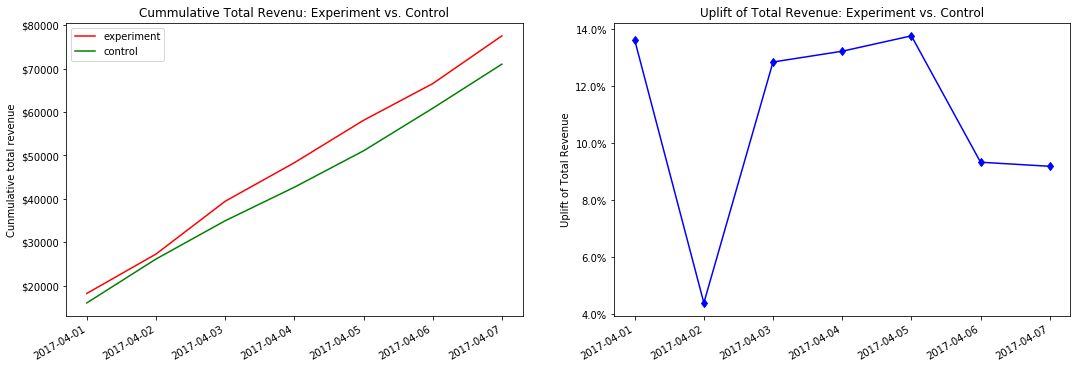

In [40]:
my_data = df1
experiment_id = 12624548
control_id = 12624549
PlotCumulativeTimeSeries(my_data, experiment_id, control_id)

It seems that there is a 5% uplift of total revenue in experiment group. Then the task goes to test if this uplift is statistically significant.

In order to compute a 95% confidence interval, a method named Jackknife is applied here. The reason why I use Jackknife is that it works well when we can't know the distribution of population or we can't any assumption for distribution of population.

#### Creating 95% confidence interval using Jackknife

In [41]:
# jackknife method 
def GetUserBucket(my_data, my_id):
    table = my_data[["user_bucket","spend_usd"]][my_data.experiment_id == my_id]
    series = table.groupby("user_bucket")["spend_usd"].sum()
    return series

def JackknifeStandardErrorTwoSample(exp_series, ctr_series):    
    n_buckets = len(exp_series)
  
    exp_sum = sum(exp_series)
    ctr_sum = sum(ctr_series)
    exp_metric = exp_sum / float(n_buckets)
    ctr_metric = ctr_sum / float(n_buckets)
  
    metric_diff = exp_metric - ctr_metric  # metric is the difference of total spend between two groups

    exp_series = exp_series.tolist()
    ctr_series = ctr_series.tolist()
    jackknife_sum_squares = 0.0
  
    for i in range(n_buckets):
        jackknife_bucket = (exp_sum - exp_series[i]) / float(n_buckets - 1) - (ctr_sum - ctr_series[i]) / float(n_buckets - 1)            
        jackknife_sum_squares += (jackknife_bucket - metric_diff) ** 2
  
    metric_se = np.sqrt(jackknife_sum_squares * ((n_buckets - 1) / float(n_buckets)))
    return metric_diff, metric_se

In [42]:
# create confidecne interval
def CreateTConfidenceInterval(overall_metric,
                              metric_se,
                              n_buckets=20,   # because n ia less than 30, we use t-test
                              confidence_level=0.05):
    t_rv = t(n_buckets - 1)
    t_statistic = t_rv.ppf(1 - confidence_level / 2.0)   #critical value 

    upper_bound = overall_metric + t_statistic * metric_se
    lower_bound = overall_metric - t_statistic * metric_se
    return lower_bound, upper_bound

In [43]:
def GetCumulativeUserBucket(my_data, my_id, until_date):
    table = my_data[["user_bucket","date","spend_usd"]][my_data.experiment_id == my_id]
    series = table[table.date <= until_date].groupby("user_bucket")["spend_usd"].sum()
    return series

In [46]:
# plot cumulative confidence interval on difference
def PlotCumulativeTimeSerieswithCI(my_data, exp_id, ctr_id, confidence_level=0.05):
    days_ = []
    value_ = []
    lower_ = []
    upper_ = []
    baseline_ = []
    my_dates = my_data.date.unique()

    for unique_day in my_dates:
        exp_series = GetCumulativeUserBucket(my_data, exp_id, unique_day)
        ctr_series = GetCumulativeUserBucket(my_data, ctr_id, unique_day)
        baseline_.append(0.0)
        
        metric, se = JackknifeStandardErrorTwoSample(exp_series, ctr_series)
        lower, upper = CreateTConfidenceInterval(metric, se)
        control = sum(ctr_series) # total spend untill a day

        days_.append(unique_day)

        value_.append(metric / control)  # uplift of experiment compared to control
        lower_.append(lower / control)   
        upper_.append(upper / control)

    # our final CI
    lower_bound_pct = round(lower_[-1]*100,2)
    upper_bound_pct = round(upper_[-1]*100,2)
    avg_metric_pct = round(value_[-1]*100,2)
    is_stat_sig = "YES" if lower_bound_pct>0 or upper_bound_pct<0 else "NO"
    
    print ("Experiment", exp_id)
    print ("  Jackkinfe confidence interval: [{0}%, {1}%]".format(
        lower_bound_pct, upper_bound_pct))
    print ("  Statistical significance: {0}".format(is_stat_sig))
        
    # draw the chart
    final_data = pd.DataFrame(
        {
            'date': days_,
            'value': value_,
            'upper': upper_,
            'lower': lower_,
            'baseline': baseline_
        },
        index = days_,
        columns=['date','value','upper','lower','baseline']).sort_values(by='date', ascending=True)

    fig, ax4 = plt.subplots(figsize=(8, 6))
    ax4.plot(final_data.index, final_data.value, color="blue")
    ax4.plot(final_data.index, final_data.baseline, color="black")
    vals = ax4.get_yticks()
    ax4.set_yticklabels(['{:3.1f}%'.format(x*100) for x in vals])
    ax4.fill_between(final_data.index, final_data.lower, final_data.upper, color="blue", alpha=0.2)
    ax4.plot(y=0)
    ax4.grid(linestyle = '--')
    plt.gcf().autofmt_xdate()

Experiment 12624548
  Jackkinfe confidence interval: [-0.76%, 1.69%]
  Statistical significance: NO


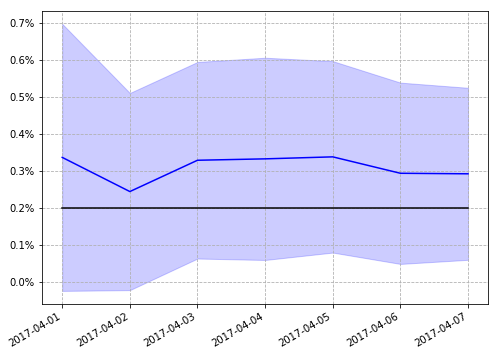

In [47]:
PlotCumulativeTimeSerieswithCI(df1,12624548,12624549)

In order to figure out the reason behind the insignificance, I will selice data further to pictures which segments cause the this result. For example, I could slice data according to 'vertical' or "country", then create the 95% confience interval to see whether the result is significant for each groups.<br>
Suppose that they were neither significant however I slice the data. 

## Recommendation

There is no statistcal significance in uplift of total revenue of experiment group. This means there is no impact made on the total revenue by the marketing campaign if we run the same campaign multiple times. In other word, this strategy just works less than 95 times out of every 100 times of campaign made. 

As a result, we can't reach the goal to increase total revenue by 5% for the next quarter. In order to reach the goal, we have to switch to another strategy and then conduct a A/B test to see the significance. 

Plan B: Incentivize cusomters to add gift cards as more as possible to their accounts.<br>
Plan c: Send direct emails to remind customers to check out after they have been dormant for 3+ days after adding items to cart 